# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension,
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.843277e+01     1.391940e+01
 * time: 0.001706838607788086
     1     3.407021e+01     1.097886e+01
 * time: 0.00718998908996582
     2     2.894954e+01     6.565649e+00
 * time: 0.013249874114990234
     3     2.270166e+01     4.879426e+00
 * time: 0.018584012985229492
     4     1.981366e+01     1.500507e+00
 * time: 0.024005889892578125
     5     1.955422e+01     2.751591e+00
 * time: 0.028454065322875977
     6     1.896747e+01     2.397718e+00
 * time: 0.03293800354003906
     7     1.868693e+01     2.297480e+00
 * time: 0.037561893463134766
     8     1.821809e+01     1.493358e+00
 * time: 0.04219794273376465
     9     1.789990e+01     1.389629e+00
 * time: 0.09302186965942383
    10     1.764835e+01     1.020134e+00
 * time: 0.09714794158935547
    11     1.745637e+01     6.275260e-01
 * time: 0.1010599136352539
    12     1.735111e+01     5.092595e-01
 * time: 0.10497403144836426
    13     1.729287e+01     7.707659e-01
 * 

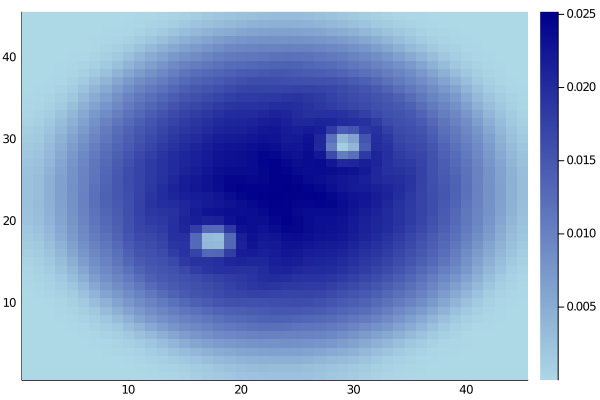

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)